## PROJECT 1: Comcast Telecommunication ##

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset

df = pd.read_csv('Comcast_telecom_complaints_data.csv')

Task 1: Trend Chart for Complaints at Monthly and Daily Levels

In [3]:
# Attempt to convert the 'Date' column to datetime format, specifying the expected date format 
# If conversion fails, log the error for debugging

try: df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')
except Exception as e:
    print("Error converting dates:", e)

In [4]:
# Remove rows with missing values in the 'Date' column to ensure data integrity for analysis

df = df.dropna(subset=['Date'])

In [5]:
# Group the data by date & month and count the number of entries for each day & month

daily_trend = df.groupby(df['Date'].dt.date).size()
monthly_trend = df.groupby(df['Date'].dt.to_period('M')).size()

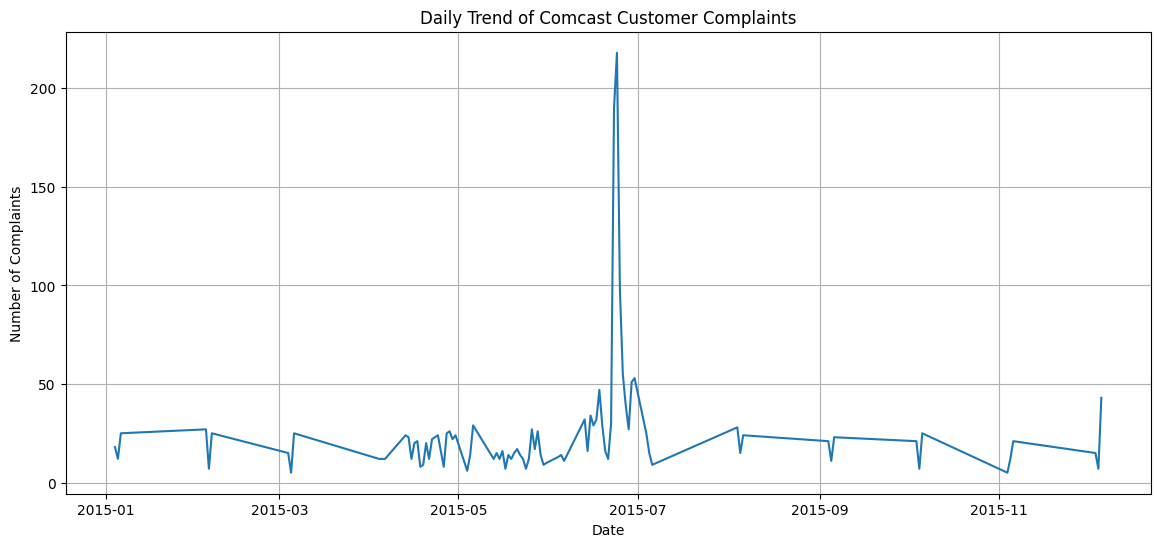

In [6]:
# Plotting the daily coomplaint trend

plt.figure(figsize=(14,6))
daily_trend.plot()
plt.title("Daily Trend of Comcast Customer Complaints")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.grid()
plt.show()

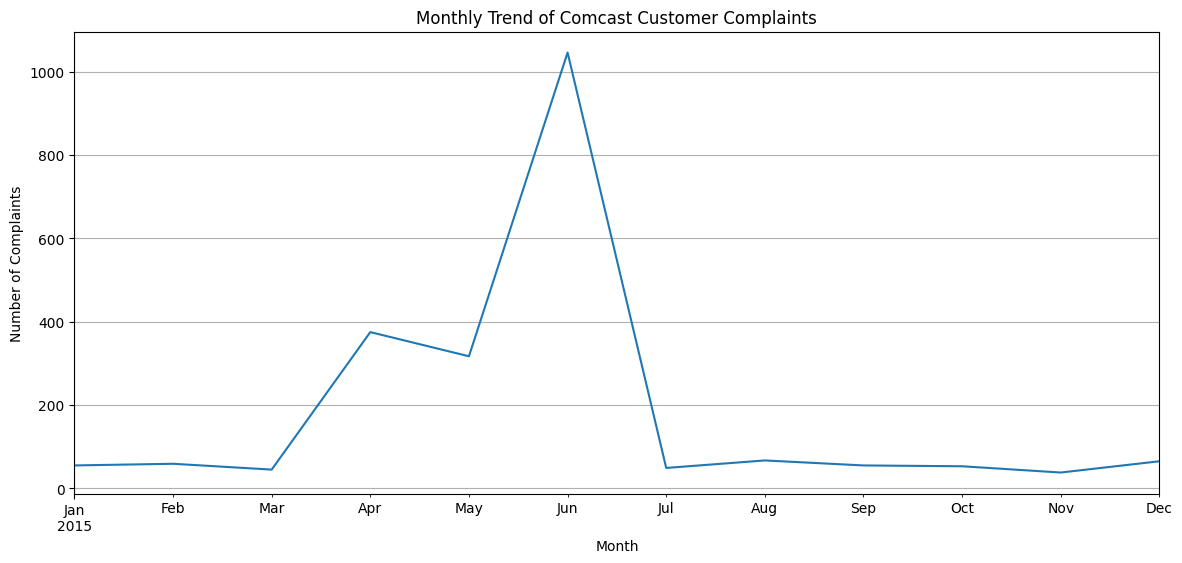

In [7]:
# Plotting the monthly complaint trend

plt.figure(figsize=(14,6))
monthly_trend.plot()
plt.title("Monthly Trend of Comcast Customer Complaints")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.grid()
plt.show()

Task 2: Frequency Table for Complaint Types

In [8]:
complaint_type_freq = df['Customer Complaint'].value_counts()
complaint_type_freq.head(10) # Display top 10 frequent complaints

Customer Complaint
Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast data caps            8
Data Cap                     8
Name: count, dtype: int64

Task 3: Maximum Complaint Types (e.g., Internet, Network Issues)

In [9]:
complaint_categories = {
    'Internet': ['internet', 'broadband', 'wifi'],
    'Network': ['network', 'connection', 'speed'],
    'Billing': ['billing', 'charges', 'cost'],
    'Service': ['service', 'support', 'customer serrvice']                
}

In [10]:
def categorize_complaint(complaint):
    for category, keywords in complaint_categories.items():
        if any(keyword.lower() in complaint.lower() for keyword in keywords):
            return category
    return 'Others'

df['Complaint Category'] = df['Customer Complaint'].apply(categorize_complaint)

In [11]:
# Frequency of each category

category_counts = df['Complaint Category'].value_counts()
print(category_counts)

Complaint Category
Others      968
Internet    545
Billing     326
Service     282
Network     103
Name: count, dtype: int64


Task 4: Categorize Complaints as Open or Closed

In [13]:
# Create a new categorical variable for Complaint Status

df['Complaint Status'] = df['Status'].replace({'Open': 'Open', 'Pending': 'Open', 'Closed': 'Closed', 'Solved': 'Closed'})

Task 5: State-wise Complaint Status (Stacked Bar Chart)

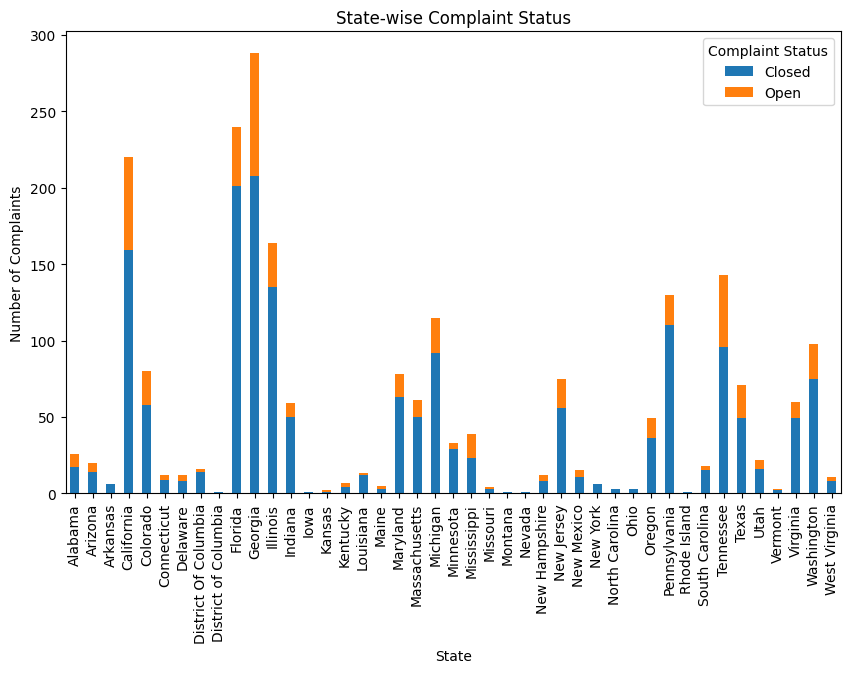

In [16]:
state_status = df.groupby(['State', 'Complaint Status']).size().unstack()

state_status.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('State-wise Complaint Status')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.show()

Task 6: State with Maximum Complaints

In [17]:
max_complaints_state = df['State'].value_counts().idxmax()
max_complaints_count = df['State'].value_counts().max()
print(f"The state with the maximum complaints is {max_complaints_state} with {max_complaints_count} complaints.")

The state with the maximum complaints is Georgia with 288 complaints.


Task 7: State with Highest Percentage of Unresolved Complaints

In [26]:
# Calculate thee percentage of unresolved complaints by state

unresolved_complaints = df[df['Complaint Status'] == 'Open'].groupby('State').size()
total_complaints = df.groupby('State').size()

# Calculate the percentage of unresolvedd complaints

percentage_unresolved = (unresolved_complaints / total_complaints * 100).fillna(0)

# Identify the state with the highest percentage of unresolved complaints

highest_unresolved_state = percentage_unresolved.idxmax()
highest_unresolved_percentage = percentage_unresolved.max()

In [27]:
print(f"The state with the highest percentage of unresolved complaints is: {highest_unresolved_state} with {highest_unresolved_percentage:.2f}%.")

The state with the highest percentage of unresolved complaints is: Kansas with 50.00%.


Task 8: Percentage of Complaints Resolved via Internet and Customer Care Calls

In [28]:
# Calculate the percentage of complaints resolved till date for Internet and Customer Care Calls

resolved_complaints = df[df['Complaint Status'] == 'Closed'].groupby('Received Via').size()
total_received_complaints = df.groupby('Received Via').size()

# Calculate the percentage of resolved complaints for Internet and Customer Care Calls

resolved_percentage = (resolved_complaints / total_received_complaints * 100).fillna(0)

# Get the resolved percentage for Internet and Customer Care Calls

internet_resolved = resolved_percentage.get('Internet', 0)
customer_care_resolved = resolved_percentage.get('Customer Care Call', 0)

In [29]:
print(f"Percentage of complaints resolved till date received through the Internet: {internet_resolved:.2f}%")
print(f"Percentage of complaints resolved till date received through the Customer Care Calls: {customer_care_resolved:.2f}%")

Percentage of complaints resolved till date received through the Internet: 76.29%
Percentage of complaints resolved till date received through the Customer Care Calls: 77.21%
